In [1]:
# JM: 24 Oct 2020
# sample commands to plot out WOA13 data 
# (cheating a bit here, actually using the input files that have been doctored for use in NEMO)

%matplotlib inline

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean

# define some defaults
plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["mathtext.rm"] = "serif"
plt.rcParams["image.cmap"] = "RdBu_r" # \"*_r\" is reverse of standard colour\n",
plt.rcParams["axes.formatter.limits"] = [-4, 4]
plt.rcParams["font.size"] = 12.0

In [2]:
data_dir = "/home/jclmak/data/WOA13/"

ds = xr.open_dataset(data_dir + "salinity_WOA13_decav_Reg1L46_clim.nc")
lon  = ds["lon"].data
lat  = ds["lat"].data
z    = -ds["lev"].data
soce = ds["vosaline"].mean(dim="time")

ds = xr.open_dataset(data_dir + "temperature_WOA13_decav_Reg1L46_clim.nc")
toce = ds["votemper"].mean(dim="time")

ds = xr.open_dataset(data_dir + "GRIDONE_2D.nc")
bathy = ds["elevation"]

outputted files


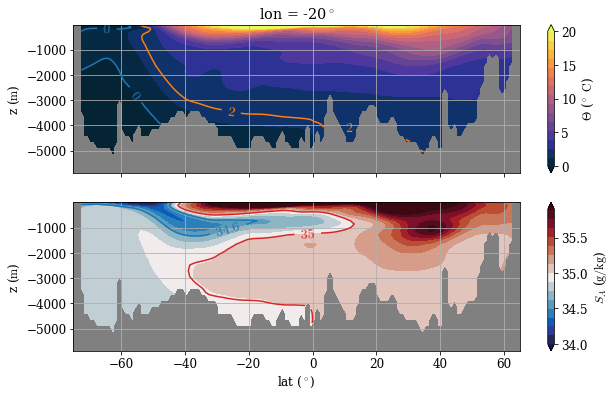

In [3]:
# do a plot (Atlantic)
target_lon = -20.1
actual_lon = soce.sel(lon=target_lon, method="nearest")["lon"].data
soce_data  = soce.sel(lon=target_lon, method="nearest").data
toce_data  = toce.sel(lon=target_lon, method="nearest").data

# do a masking based on the GEBCO data
for j in range(len(lat)):
    mask_value = bathy.sel(lon=target_lon, lat=lat[j], method="nearest").data
    soce_data[(z < mask_value), j] = np.nan
    toce_data[(z < mask_value), j] = np.nan

toce_opt = {"levels" : np.linspace(0, 20, 16),
           "cmap"    : cmocean.cm.thermal,
           "extend"  : "both",
           }

soce_opt = {"levels" : np.linspace(34, 35.9, 16),
           "cmap"    : cmocean.cm.balance,
           "extend"  : "both",
           }

fig = plt.figure(figsize=(10, 6))
ax = plt.subplot2grid((2, 1), (0, 0))
mesh = ax.contourf(lat, z, toce_data, **toce_opt)
line = ax.contour(lat, z, toce_data, levels=[2], colors="C1")
ax.clabel(line, fmt = r"$2$", colors="C1", fontsize=14)
line = ax.contour(lat, z, toce_data, levels=[0], colors="C0")
ax.clabel(line, fmt = r"$0$", colors="C0", fontsize=14)
ax.set_xlim(-75, 65)
ax.set_ylabel(r"z (${\rm m}$)")
ax.set_title(f"lon = {actual_lon:.0f}$^\circ$")
ax.set_xticklabels([])
ax.grid()
ax.set_facecolor('gray')
cax = plt.colorbar(mesh)
cax.set_ticks(np.arange(0, 21, 5))
cax.ax.set_ylabel(r"$\Theta$ (${}^\circ\ {\rm C}$)")

ax = plt.subplot2grid((2, 1), (1, 0))
mesh = ax.contourf(lat, z, soce_data, **soce_opt)
line = ax.contour(lat, z, soce_data, levels=[35], colors="C3")
ax.clabel(line, fmt = r"$35$", colors="C3", fontsize=14)
line = ax.contour(lat, z, soce_data, levels=[34.6], colors="C0")
ax.clabel(line, fmt = r"$34.6$", colors="C0", fontsize=14)
ax.set_xlim(-75, 65)
ax.set_ylabel(r"z (${\rm m}$)")
ax.set_xlabel(r"lat (${}^\circ$)")
ax.grid()
ax.set_facecolor('gray')
cax = plt.colorbar(mesh)
cax.set_ticks(np.arange(34, 36.1, 0.5))
cax.ax.set_ylabel(r"$S_A$ (${\rm g/kg}$)")

plt.savefig(f"pics/WOA13_atlantic_section.png", dpi = 75, bbox_inches = "tight")
    
print("outputted files")

outputted files


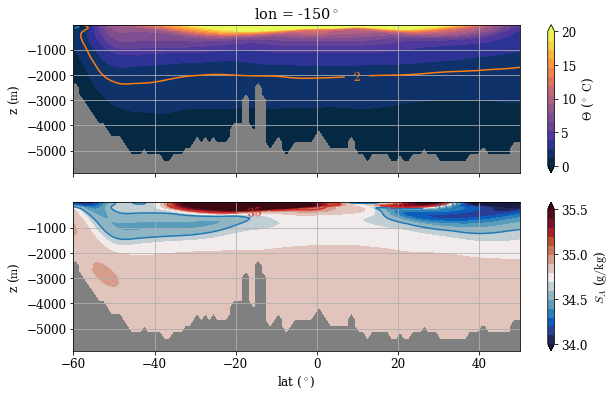

In [4]:
# do a plot (Pacific)
target_lon = -150.1
actual_lon = soce.sel(lon=target_lon, method="nearest")["lon"].data
soce_data  = soce.sel(lon=target_lon, method="nearest").data
toce_data  = toce.sel(lon=target_lon, method="nearest").data

# do a masking based on the GEBCO data
for j in range(len(lat)):
    mask_value = bathy.sel(lon=target_lon, lat=lat[j], method="nearest").data
    soce_data[(z < mask_value), j] = np.nan
    toce_data[(z < mask_value), j] = np.nan

toce_opt = {"levels" : np.linspace(0, 20, 16),
           "cmap"    : cmocean.cm.thermal,
           "extend"  : "both",
           }

soce_opt = {"levels" : np.linspace(34, 35.5, 16),
           "cmap"    : cmocean.cm.balance,
           "extend"  : "both",
           }

fig = plt.figure(figsize=(10, 6))
ax = plt.subplot2grid((2, 1), (0, 0))
mesh = ax.contourf(lat, z, toce_data, **toce_opt)
line = ax.contour(lat, z, toce_data, levels=[2], colors="C1")
ax.clabel(line, fmt = r"$2$", colors="C1", fontsize=14)
line = ax.contour(lat, z, toce_data, levels=[0], colors="C0")
ax.clabel(line, fmt = r"$0$", colors="C0", fontsize=14)
ax.set_xlim(-60, 50)
ax.set_ylabel(r"z (${\rm m}$)")
ax.set_title(f"lon = {actual_lon:.0f}$^\circ$")
ax.set_xticklabels([])
ax.grid()
ax.set_facecolor('gray')
cax = plt.colorbar(mesh)
cax.set_ticks(np.arange(0, 21, 5))
cax.ax.set_ylabel(r"$\Theta$ (${}^\circ\ {\rm C}$)")

ax = plt.subplot2grid((2, 1), (1, 0))
mesh = ax.contourf(lat, z, soce_data, **soce_opt)
line = ax.contour(lat, z, soce_data, levels=[35], colors="C3")
ax.clabel(line, fmt = r"$35$", colors="C3", fontsize=14)
line = ax.contour(lat, z, soce_data, levels=[34.6], colors="C0")
ax.clabel(line, fmt = r"$34.6$", colors="C0", fontsize=14)
ax.set_xlim(-60, 50)
ax.set_ylabel(r"z (${\rm m}$)")
ax.set_xlabel(r"lat (${}^\circ$)")
ax.grid()
ax.set_facecolor('gray')
cax = plt.colorbar(mesh)
cax.set_ticks(np.arange(34, 36.1, 0.5))
cax.ax.set_ylabel(r"$S_A$ (${\rm g/kg}$)")

plt.savefig(f"pics/WOA13_pacific_section.png", dpi = 75, bbox_inches = "tight")
    
print("outputted files")

In [4]:
# data for vertical plots
data_dir = "/home/jclmak/data/WOA13/"

ds = xr.open_dataset(data_dir + "salinity_WOA13_decav_Reg1L46_clim.nc")
lon  = ds["lon"].data
lat  = ds["lat"].data
z    = -ds["lev"].data
soce = ds["vosaline"]

ds = xr.open_dataset(data_dir + "temperature_WOA13_decav_Reg1L46_clim.nc")
toce = ds["votemper"]

ds = xr.open_dataset(data_dir + "GRIDONE_2D.nc")
bathy = ds["elevation"]

outputted files


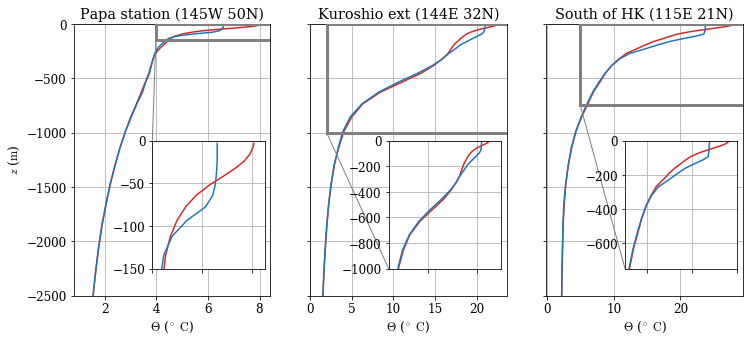

In [72]:
# do some verical plots (station Papa at 145W 50N)
#                       (Kuroshio extension observatory at 144E 32N)
#                       (south of HK 115E 21N)
fig = plt.figure(figsize=(12, 5))
ax = plt.subplot2grid((1, 3), (0, 0))
ax.plot(toce.sel(lon=-145.1, lat=50.1, time=6, method="nearest"), z, color="C3")
ax.plot(toce.sel(lon=-145.1, lat=50.1, time=12, method="nearest"), z)
ax.set_ylim(-2500, 0)
ax.set_xlabel(r"$\Theta$ (${}^\circ\ {\rm C}$)")
ax.set_ylabel(r"$z$ (${\rm m}$)")
ax.grid()
axins = ax.inset_axes([0.4, 0.1, 0.57, 0.47])
axins.plot(toce.sel(lon=-145.1, lat=50.1, time=6, method="nearest"), z, color="C3")
axins.plot(toce.sel(lon=-145.1, lat=50.1, time=12, method="nearest"), z)
axins.set_xlim(4, 8.5)
axins.set_ylim(-150, 0)
axins.set_xticklabels([])
axins.grid()
ax.indicate_inset_zoom(axins, lw=3, alpha=1)
ax.set_title(r"Papa station (145W 50N)")

ax = plt.subplot2grid((1, 3), (0, 1))
ax.plot(toce.sel(lon=144.1, lat=32.1, time=6, method="nearest"), z, color="C3")
ax.plot(toce.sel(lon=144.1, lat=32.1, time=12, method="nearest"), z)
ax.set_ylim(-2500, 0)
ax.set_xlabel(r"$\Theta$ (${}^\circ\ {\rm C}$)")
ax.set_yticklabels([])
ax.grid()
axins = ax.inset_axes([0.4, 0.1, 0.57, 0.47])
axins.plot(toce.sel(lon=144.1, lat=32.1, time=6, method="nearest"), z, color="C3")
axins.plot(toce.sel(lon=144.1, lat=32.1, time=12, method="nearest"), z)
axins.set_xlim(2, 25)
axins.set_ylim(-1000, 0)
axins.set_xticklabels([])
axins.grid()
ax.indicate_inset_zoom(axins, lw=3, alpha=1)
ax.set_title(r"Kuroshio ext (144E 32N)")

ax = plt.subplot2grid((1, 3), (0, 2))
ax.plot(toce.sel(lon=115.1, lat=21.1, time=6, method="nearest"), z, color="C3")
ax.plot(toce.sel(lon=115.1, lat=21.1, time=12, method="nearest"), z)
ax.set_ylim(-2500, 0)
ax.set_xlabel(r"$\Theta$ (${}^\circ\ {\rm C}$)")
ax.set_yticklabels([])
ax.grid()
axins = ax.inset_axes([0.4, 0.1, 0.57, 0.47])
axins.plot(toce.sel(lon=115.1, lat=21.1, time=6, method="nearest"), z, color="C3")
axins.plot(toce.sel(lon=115.1, lat=21.1, time=12, method="nearest"), z)
axins.set_xlim(5, 30)
axins.set_ylim(-750, 0)
axins.set_xticklabels([])
axins.grid()
ax.indicate_inset_zoom(axins, lw=3, alpha=1)
ax.set_title(r"South of HK (115E 21N)")

plt.savefig(f"pics/WOA13_temp_vertical.png", dpi = 75, bbox_inches = "tight")
    
print("outputted files")

outputted files


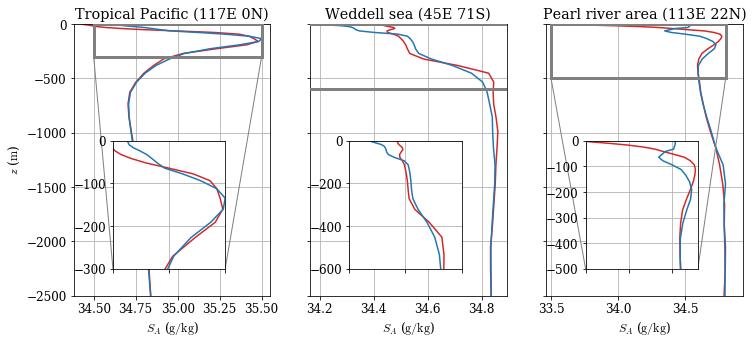

In [36]:
# do some verical plots (Tropical Pacific 117E 0N)
#                       (Weddell sea 45E 71S)
#                       (pearl river 113E 22N)
fig = plt.figure(figsize=(12, 5))
ax = plt.subplot2grid((1, 3), (0, 0))
ax.plot(soce.sel(lon=144.1, lat=0.1, time=6, method="nearest"), z, color="C3")
ax.plot(soce.sel(lon=144.1, lat=0.1, time=12, method="nearest"), z)
ax.set_ylim(-2500, 0)
ax.set_xlabel(r"$S_A$ (${\rm g/kg}$)")
ax.set_ylabel(r"$z$ (${\rm m}$)")
ax.grid()
axins = ax.inset_axes([0.2, 0.1, 0.57, 0.47])
axins.plot(soce.sel(lon=144.1, lat=0.1, time=6, method="nearest"), z, color="C3")
axins.plot(soce.sel(lon=144.1, lat=0.1, time=12, method="nearest"), z)
axins.set_xlim(34.5, 35.5)
axins.set_ylim(-300, 0)
axins.set_xticklabels([])
axins.grid()
ax.indicate_inset_zoom(axins, lw=3, alpha=1)
ax.set_title(r"Tropical Pacific (117E 0N)")

ax = plt.subplot2grid((1, 3), (0, 1))
ax.plot(soce.sel(lon=45, lat=-71.1, time=12, method="nearest"), z, color="C3") # time flipped because South Hem
ax.plot(soce.sel(lon=45, lat=-71.1, time=6, method="nearest"), z)
ax.set_ylim(-2500, 0)
ax.set_xlabel(r"$S_A$ (${\rm g/kg}$)")
ax.set_yticklabels([])
ax.grid()
axins = ax.inset_axes([0.2, 0.1, 0.57, 0.47])
axins.plot(soce.sel(lon=45, lat=-71.1, time=12, method="nearest"), z, color="C3")
axins.plot(soce.sel(lon=45, lat=-71.1, time=6, method="nearest"), z)
axins.set_xlim(34, 35)
axins.set_ylim(-600, 0)
axins.set_xticklabels([])
axins.grid()
ax.indicate_inset_zoom(axins, lw=3, alpha=1)
ax.set_title(r"Weddell sea (45E 71S)")

ax = plt.subplot2grid((1, 3), (0, 2))
ax.plot(soce.sel(lon=113.1, lat=22.5, time=6, method="nearest"), z, color="C3")
ax.plot(soce.sel(lon=113.1, lat=22.5, time=12, method="nearest"), z)
ax.set_ylim(-2500, 0)
ax.set_xlabel(r"$S_A$ (${\rm g/kg}$)")
ax.set_yticklabels([])
ax.grid()
axins = ax.inset_axes([0.2, 0.1, 0.57, 0.47])
axins.plot(soce.sel(lon=113.1, lat=22.5, time=6, method="nearest"), z, color="C3")
axins.plot(soce.sel(lon=113.1, lat=22.5, time=12, method="nearest"), z)
axins.set_xlim(33.5, 34.8)
axins.set_ylim(-500, 0)
axins.set_xticklabels([])
axins.grid()
ax.indicate_inset_zoom(axins, lw=3, alpha=1)
ax.set_title(r"Pearl river area (113E 22N)")

plt.savefig(f"pics/WOA13_sal_vertical.png", dpi = 75, bbox_inches = "tight")
    
print("outputted files")

In [2]:
data_dir = "/home/jclmak/data/WOA13/"
f = open(data_dir + "woa13_decav_s00mn04v2_mod.csv", "r")
lines = []
for line in f:
    lines.append(line)
f.close()

In [3]:
import pandas as pd

# needed to touch up the files to make the headers correct
data_dir = "/home/jclmak/data/WOA13/"
df = pd.read_csv(data_dir + "woa13_decav_s00mn04v2_mod.csv", sep=",")

,lat,lon,0,5,10,15,20,25,30,35,...,4600,4700,4800,4900,5000,5100,5200,5300,5400,5500
0,-78.375,-163.875,33.860,33.871,33.875,33.876,33.878,33.879,33.882,33.902,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-78.375,-163.625,NaN,NaN,33.984,33.984,33.983,33.985,33.983,33.984,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-78.125,-168.875,34.350,34.344,34.340,34.340,34.340,34.344,34.350,34.345,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-78.125,-166.875,NaN,NaN,34.140,34.145,34.153,34.160,34.167,34.175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-78.125,-165.875,34.315,34.181,34.180,34.186,34.195,34.214,34.245,34.269,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460544,89.875,110.625,32.329,32.319,32.320,32.320,32.320,32.319,32.319,32.319,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460545,89.875,139.125,32.212,32.212,32.213,32.214,32.214,32.218,32.245,32.310,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460546,89.875,146.875,31.310,31.317,31.349,31.469,32.373,32.874,33.154,33.364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460547,89.875,151.625,NaN,NaN,31.550,31.552,31.578,31.647,31.677,31.698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
# grab some indices and plot
index = df.index[df["lon"] == -22.875].tolist()
lat = df.iloc[index]["lat"].tolist()
z   = np.asarray(list(df)[2::], dtype=float)
data = df.iloc[index].sort_values(by=['lat']).iloc[:, 2::].to_numpy()

In [111]:
data.shape

(413, 102)

In [115]:
data_avg = np.zeros(data.shape)
for lat_dum in np.arange(-24.875, -20, 0.25):
    index = df.index[df["lon"] == lat_dum].tolist()
    data_dum = df.iloc[index].sort_values(by=['lat']).iloc[:, 2::].to_numpy()
    data_dum[np.isnan(data_dum)] = 0
    print(data_dum.shape)
    data_avg += data_dum

(445, 102)


ValueError: operands could not be broadcast together with shapes (413,102) (445,102) (413,102) 

In [113]:
data_avg

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [94]:
test = data.to_numpy()
test[np.isnan(test)] = 0
test

array([[33.899, 33.898, 33.898, ...,  0.   ,  0.   ,  0.   ],
       [33.8  , 33.961, 34.099, ...,  0.   ,  0.   ,  0.   ],
       [33.784, 33.783, 33.788, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [31.564, 31.565, 31.589, ...,  0.   ,  0.   ,  0.   ],
       [31.687, 31.687, 31.687, ...,  0.   ,  0.   ,  0.   ],
       [31.771, 31.772, 31.776, ...,  0.   ,  0.   ,  0.   ]])

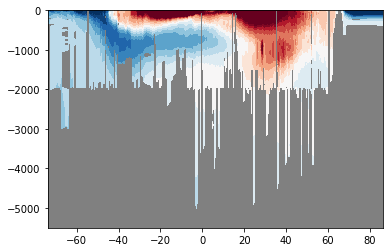

In [79]:
ax = plt.axes()
plt.contourf(lat, -z, data.transpose(), levels=np.linspace(34, 36, 16), cmap="RdBu_r", extend="both")
ax.set_facecolor('gray')